In [25]:
import requests
import pandas as pd

# Define the API endpoint and parameters
url = "https://api.fda.gov/food/enforcement.json?search=report_date:[20200101+TO+20240804]&limit=500"

# Send a GET request to the API
response = requests.get(url)


# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON data
    data = response.json()
    
    # Extract the list of results (recalls)
    recalls = data.get('results', [])
    
    # Create a DataFrame from the list of recall records
    recall_df = pd.DataFrame(recalls)
    
    # Save the DataFrame to a CSV file
    recall_df.to_csv('fda_food_enforcement_data.csv', index=False)

In [26]:
clean_df = recall_df.rename(columns={"status": "Status", 
                                     "city": "City",
                                     "state": "State",
                                     "country":"Country",
                                     "classification":"Classification",
                                     "openfda":"Open FDA",
                                     "product_type":"Product Type",
                                     "event_id":"Event ID",
                                     "recalling_firm":"Recalling Firm",
                                     "address_1":"Address 1",
                                     "address_2":"Address 2",
                                     "postal_code":"Postal Code",
                                     "voluntary_mandated":"Voluntary Mandated",
                                     "initial_firm_notification":"Initial Firm Notification",
                                     "distribution_pattern":"Distribution Pattern",
                                     "recall_number":"Recall Number",
                                     "product_description":"Product Description",
                                     "product_quantity":"Product Quantity",
                                     "reason_for_recall":"Reason for Recall",
                                     "recall_initiation_date":"Recall Initiation Date",
                                     "center_classification_date":"Center Classification Date",
                                     "termination_date":"Termination Date",
                                     "report_date":"Report Date",
                                     "code_info":"Code Info",
                                     "more_code_info":"More Code Info",
                                    
                                     })

clean_df

,Status,City,State,Country,Classification,Open FDA,Product Type,Event ID,Recalling Firm,Address 1,...,Recall Number,Product Description,Product Quantity,Reason for Recall,Recall Initiation Date,Center Classification Date,Termination Date,Report Date,Code Info,More Code Info
0,Terminated,Rancho Dominguez,CA,United States,Class III,{},Food,85253,"Organic By Nature, Inc.",2610 Homestead Pl,...,F-0904-2020,Pure Planet Organic Parasite Cleanse; Net Wt....,xx,Firm was notified by supplier that Organic Gro...,20200224,20200413,20210202,20200401,Lot codes: 72746,
1,Terminated,Brooklyn,NY,United States,Class III,{},Food,85364,Rong Shing Trading NY Inc,47 Bridgewater St # 57,...,F-0921-2020,"XinXing Dried Plum, Net Wt. 5.3 oz.(150g)",unknown,"Product contains dried peaches, but front labe...",20200401,20200424,20210318,20200506,UPC CODE: 6868978724496 BEST BEFORE: 11/15/2021,NaN
2,Terminated,Monterey,CA,United States,Class I,{},Food,89381,Dole Fresh Vegetables Inc,2959 Salinas Hwy,...,F-0757-2022,Marketside 12oz Classic Salad UPC:6-81131-328...,,Harvest equipment used in harvesting raw icebe...,20220106,20220222,20220322,20220302,Product codes beginning with B - Best by Dates...,
3,Terminated,Lovell,WY,United States,Class II,{},Food,90158,"Queen Bee Gardens, LLC",262 E Main St,...,F-1472-2022,Honey Caramels Blue Raspberry. Product availab...,171 pieces,Products may potentially contain one or more o...,20220428,20220719,20230117,20220727,None,NaN
4,Terminated,Nof Ha-Galil,,Israel,Class I,{},Food,90105,ELITE CONFECTIONERY LTD,Nazareth-Ilit,...,F-1233-2022,ELITE MILK CHOCOLATE COATED RICE CAKES UPC:81...,unknown,Potential contamination with Salmonella,20220428,20220604,20221103,20220615,All lots,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Ongoing,Salinas,CA,United States,Class I,{},Food,92684,Braga Fresh Foods,121 Spreckels Blvd Bldg 10,...,F-1293-2023,365 by Whole Foods Market Organic Asian Inspir...,673 cases,Undeclared milk and egg,20230710,20230725,NaN,20230726,Lot code - BFFS179A2 Best if Used By: 7/16/2023,
496,Terminated,Bharuch,,India,Class I,{},Food,92067,JABSONS FOODS PRIVATE LIMITED (Formerly Known ...,"A-2, Bholav Udhyog Nagar",...,F-0817-2023,Tandoori Kaju- Cashew Nuts; Net. Wt 3.53 oz L...,187 cases,Undeclared Milk,20230319,20230504,20230804,20230510,"UPC Code 8904067711577 Lot # US4-09, US4-08,US...",
497,Completed,East Arlington,VT,United States,Class I,{},Food,93452,WILCOX ICE CREAM,116 Sweet St,...,F-0538-2024,"Wilcox Premium Maple Walnut in 1.5QT, Quart, P...",19.31 Tons Total,Products may be contaminated with Listeria mon...,20231115,20231208,NaN,20231220,Best By/Sell By dates of 9/14/24 to 11/14/24,NaN
498,Terminated,Inver Grove Heights,MN,United States,Class I,{},Food,93516,"Cut Fruit Express, Inc.",11585 Courthouse Blvd,...,F-0583-2024,"Mixed Fruit Products that contain Cantaloupe, ...",123 units,Cantaloupe containing products may be contamin...,20231124,20231213,20240111,20231220,1. 11/5/23 2. 11/5/23 3. 11/4/23 4. 11/4/...,NaN


In [27]:
classification_counts = clean_df['Classification'].value_counts()

    # Display the classification counts
print(classification_counts)


Classification
Class II     246
Class I      229
Class III     25
Name: count, dtype: int64


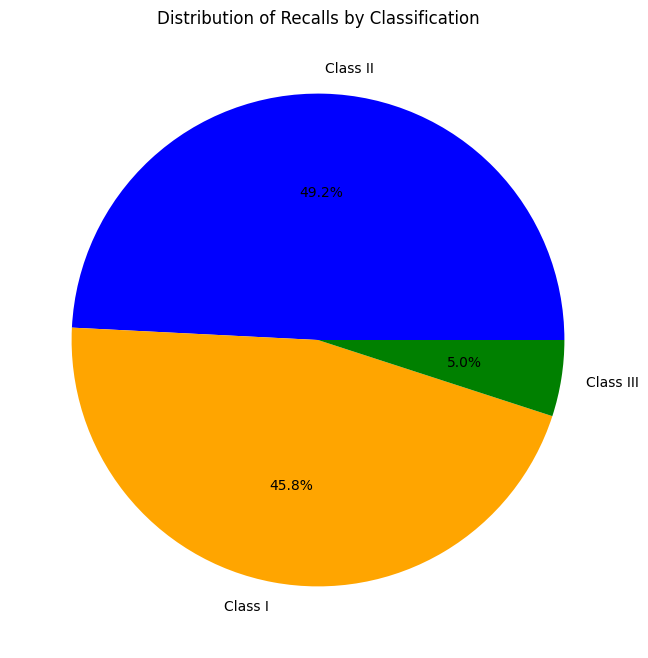

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.pie(classification_counts, labels=classification_counts.index, autopct='%1.1f%%', colors=['blue', 'orange', 'green'])
plt.title('Distribution of Recalls by Classification')
plt.show()
clean_df['Report Year'] = pd.to_datetime(clean_df['Report Date']).dt.year
    
    # Count recalls by classification and company
classification_company_counts = clean_df.groupby(['Classification', 'Recalling Firm']).size().unstack(fill_value=0)
    



Recall counts by Classification and Year:
Report Year     2020  2021  2022  2023  2024
Classification                              
Class I           29    30    62    90    18
Class II          52    58    40    60    36
Class III          8     1     3    11     2


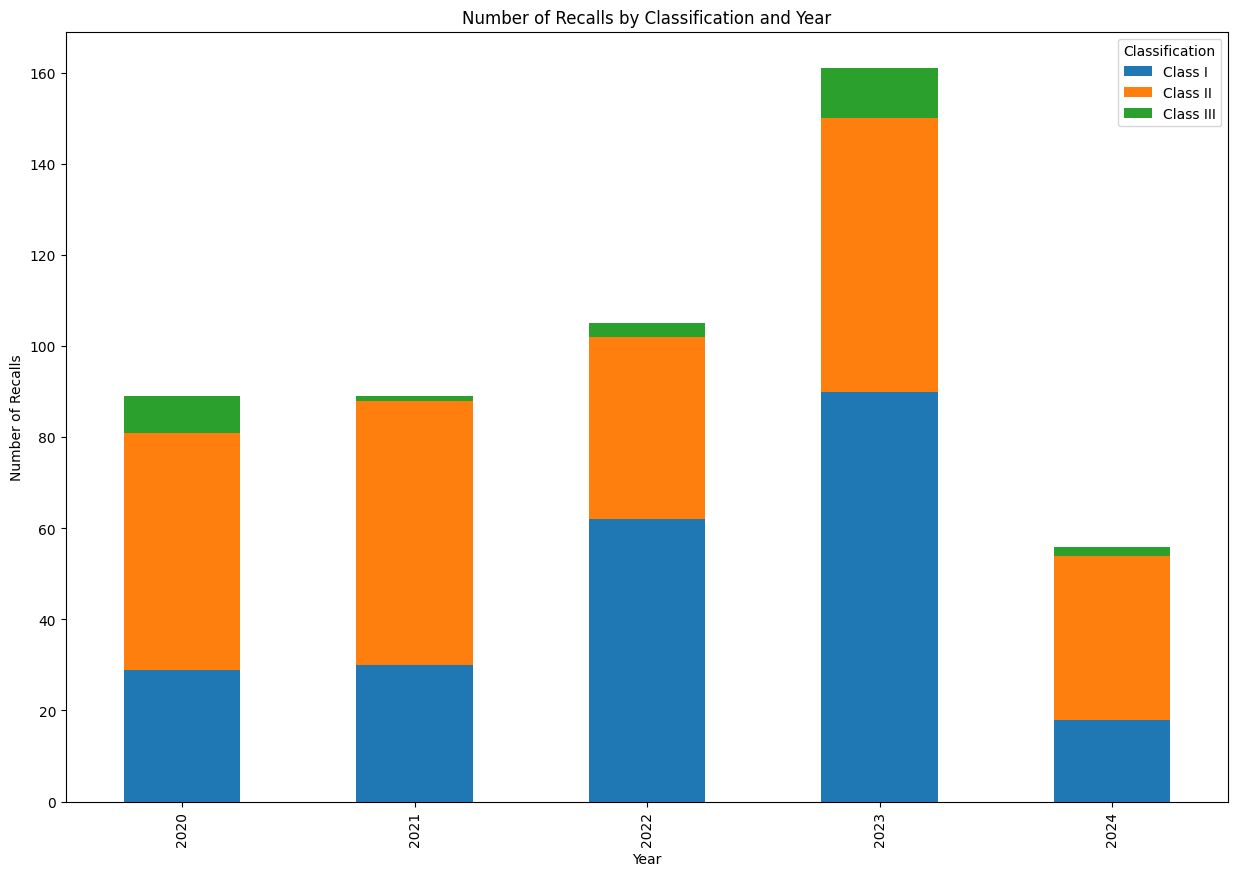

In [34]:
    # Count recalls by classification and year
# Extract year from report_date
clean_df['Report Year'] = pd.to_datetime(clean_df['Report Date']).dt.year
    
    # Group by Classification and Report Year, and count the occurrences
classification_year_counts = clean_df.groupby(['Classification', 'Report Year']).size().unstack(fill_value=0)
    
    # Display the counts in the console
print("Recall counts by Classification and Year:")
print(classification_year_counts)
    
    # Plot classification and year relationship
classification_year_counts.T.plot(kind='bar', stacked=True, figsize=(15, 10))
plt.title('Number of Recalls by Classification and Year')
plt.xlabel('Year')
plt.ylabel('Number of Recalls')
plt.legend(title='Classification')
plt.show()

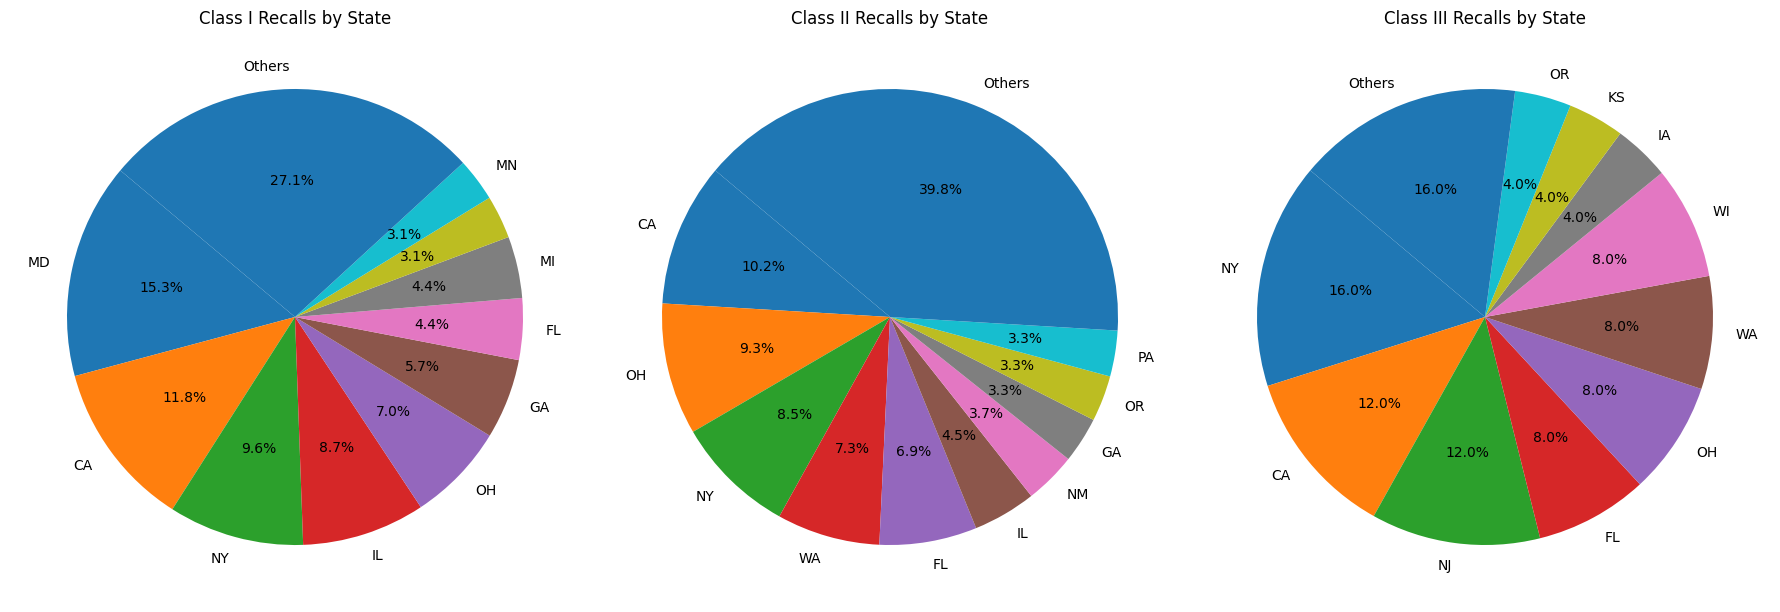

In [33]:
# Group by Classification and State, and count the occurrences
classification_state_counts = clean_df.groupby(['Classification', 'State']).size().unstack(fill_value=0)
    
    # Function to prepare data for pie chart with top 10 states and "Others"
def prepare_pie_data(data):
        top_10 = data.nlargest(10)
        others = pd.Series(data.sum() - top_10.sum(), index=['Others'])
        return pd.concat([top_10, others])
    
    # Plot pie charts for each classification
classifications = ['Class I', 'Class II', 'Class III']
    
plt.figure(figsize=(18, 6))  # Adjust the size to fit three pie charts
    
for i, classification in enumerate(classifications):
        plt.subplot(1, 3, i + 1)
        if classification in classification_state_counts.index:
            pie_data = prepare_pie_data(classification_state_counts.loc[classification])
            pie_data.plot(kind='pie', autopct='%1.1f%%', startangle=140)
            plt.title(f'{classification} Recalls by State')
            plt.ylabel('')  # Remove the y-label to clean up the plot
    
plt.tight_layout()
plt.show()

